In [1]:
import numpy as np
import matplotlib.pyplot as plt
import codecs, cv2, datetime, glob, itertools, keras, os, pickle
import re, sklearn, string, sys, time
import tensorflow as tf
from random import randint
from keras import backend as K, regularizers, optimizers
from keras.models import load_model, Sequential
from keras.layers import MaxPooling2D, Convolution2D, Activation, Dropout, Flatten, Dense, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
img_width  = 28
img_height = 28
channels   = 1

batch_size = 250
num_epochs = 80

classes = {0: 'Póló',1: 'Nadrág',2: 'Pulóver',3: 'Ruha',4: 'Kabát',5: 'Szandál',6: 'Ing',7: 'Cipő',8: 'Táska',9: 'Csizma'}
num_classes         = len(classes)
classes_fashion     = ['Póló','Nadrág','Pulóver','Ruha','Kabát','Szandál','Ing','Cipő','Táska','Csizma']

In [5]:

ann = Sequential()

ann.add(Dense(784, activation='relu'))
ann.add(Dropout(0.5))
ann.add(BatchNormalization())

ann.add(Dense(392, activation='relu'))
ann.add(Dropout(0.5))
ann.add(BatchNormalization())

ann.add(Dense(64, activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(BatchNormalization())

ann.add(Dense(num_classes, activation='softmax'))
ann.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

#ann.summary()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
def shaping(data, target):
    data = np.array(data, dtype=np.uint8)
    target = np.array(target, dtype=np.uint8)
    data= data.reshape(data.shape[0],784)    
    target = np_utils.to_categorical(target, num_classes)
    data = data.astype('float32')
    data /= 255
    return data, target

In [0]:
train_data_shaped, train_target_shaped  = shaping(x_train, y_train)
test_data_shaped, test_target_shaped    = shaping(x_test, y_test)

In [8]:
print(x_train.shape)
data= x_train.reshape(x_train.shape[0],784)
print(data.shape)

(60000, 28, 28)
(60000, 784)


In [9]:
histories = []

history = ann.fit(train_data_shaped,train_target_shaped,batch_size=batch_size,epochs=num_epochs,verbose=1,validation_data=(test_data_shaped,  test_target_shaped))
    
histories.append(history.history)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 20s 340us/step - loss: 0.8151 - acc: 0.7309 - val_loss: 0.4643 - val_acc: 0.8298
Epoch 2/80
60000/60000 [==============================] - 18s 302us/step - loss: 0.5443 - acc: 0.8175 - val_loss: 0.4521 - val_acc: 0.8345
Epoch 3/80
60000/60000 [==============================] - 19s 310us/step - loss: 0.5060 - acc: 0.8272 - val_loss: 0.4282 - val_acc: 0.8431
Epoch 4/80
60000/60000 [==============================] - 18s 304us/step - loss: 0.4831 - acc: 0.8345 - val_loss: 0.4443 - val_acc: 0.8347
Epoch 5/80
60000/60000 [==============================] - 19s 318us/step - loss: 0.4652 - acc: 0.8389 - val_loss: 0.3801 - val_acc: 0.8602
Epoch 6/80
60000/60000 [==============================] - 18s 302us/step - loss: 0.4479 - ac

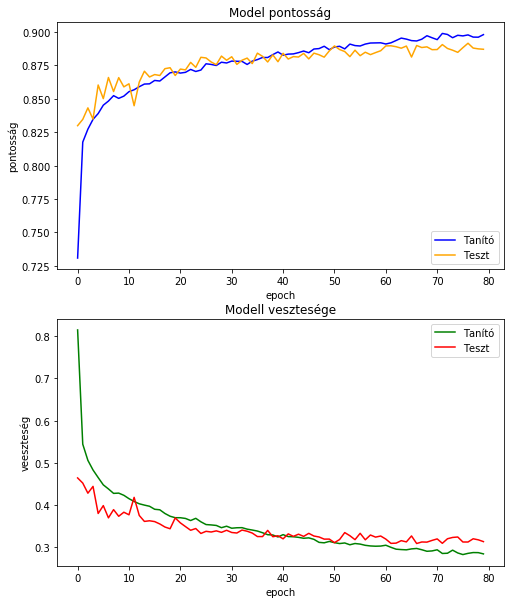

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10))

ax1.set_title('Model pontosság')
ax1.plot(histories[0]['acc'], color='blue')
ax1.plot(histories[0]['val_acc'], color='orange')
ax1.set_xlabel('epoch')
ax1.set_ylabel('pontosság')
ax1.legend(['Tanító', 'Teszt'], loc='lower right')

ax2.set_title('Modell vesztesége')
ax2.plot(histories[0]['loss'], color ='green')
ax2.plot(histories[0]['val_loss'], color='red')
ax2.set_xlabel('epoch')
ax2.set_ylabel('veeszteség')
ax2.legend(['Tanító', 'Teszt'], loc='upper right')

plt.show()

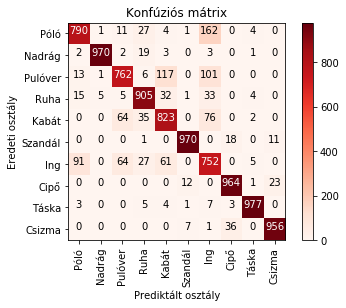

In [12]:
predictions = ann.predict_classes(test_data_shaped, verbose=0)
cm=confusion_matrix(y_test, predictions)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Konfúziós mátrix')
tick_marks = np.arange(len(classes_fashion))
plt.xticks(tick_marks, classes_fashion, rotation=90)
plt.yticks(tick_marks, classes_fashion)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Eredeti osztály')
plt.xlabel('Prediktált osztály')
plt.colorbar()
plt.show()
    

In [13]:
from sklearn.metrics import accuracy_score

print(classification_report(y_test, predictions))
print('Accuracy: ' + str(accuracy_score(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.76      0.80      1000
           3       0.88      0.91      0.89      1000
           4       0.79      0.82      0.81      1000
           5       0.98      0.97      0.97      1000
           6       0.66      0.75      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 0.8869
